# KNN

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('glass_type.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
from sklearn.model_selection import train_test_split
X = df.drop(labels=['Type'] ,axis=1)
y = df['Type'].values
X_train , X_test , y_train , y_test = train_test_split(X, y ,test_size=0.2 , random_state=5)

In [4]:
print(len(X_train))
print(len(X_test))

171
43


In [5]:
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=2)
knnModel.fit(X_train, y_train)
# 準確度評估
print('訓練集: ', knnModel.score(X_train, y_train))
print('測試集: ',knnModel.score(X_test, y_test))

y_pred = knnModel.predict(X_test)

訓練集:  0.8421052631578947
測試集:  0.7441860465116279


In [6]:
# 建立訓練集的 DataFrme
df_train = pd.DataFrame(X_train)
df_train['Type'] = y_train
# 建立測試集的 DataFrme
df_test = pd.DataFrame(X_test)
df_test['Type'] = y_test

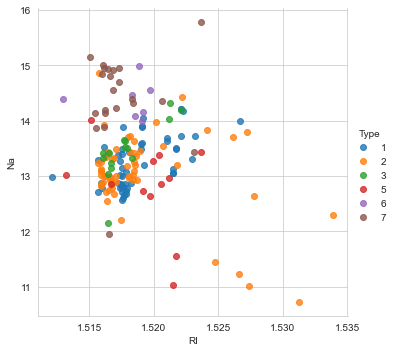

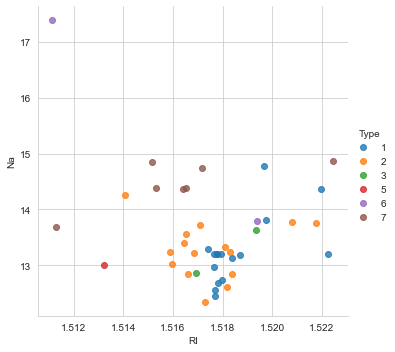

In [12]:
# 訓練集
sns.lmplot("RI", "Na", hue='Type', data=df_train, fit_reg=False)
# 測試集
sns.lmplot("RI", "Na", hue='Type', data=df_test, fit_reg=False)

In [8]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  1,  3,  0,  0,  0],
       [ 3, 12,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  2,  0,  0,  0,  5]], dtype=int64)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.71      0.75      0.73        16
           2       0.80      0.80      0.80        15
           3       0.00      0.00      0.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      0.71      0.83         7

    accuracy                           0.74        43
   macro avg       0.75      0.71      0.73        43
weighted avg       0.77      0.74      0.76        43



## cross validation

<Figure size 432x288 with 0 Axes>

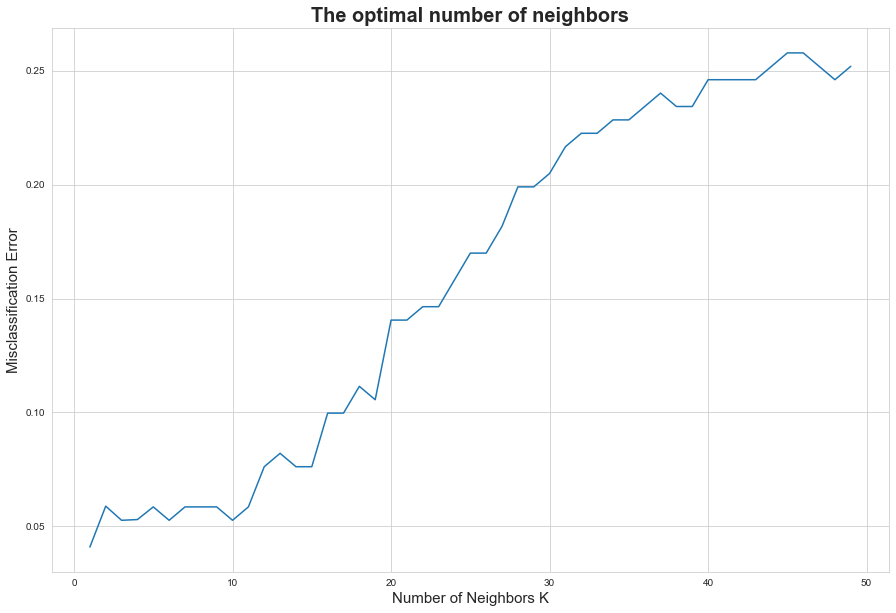

<Figure size 432x288 with 0 Axes>

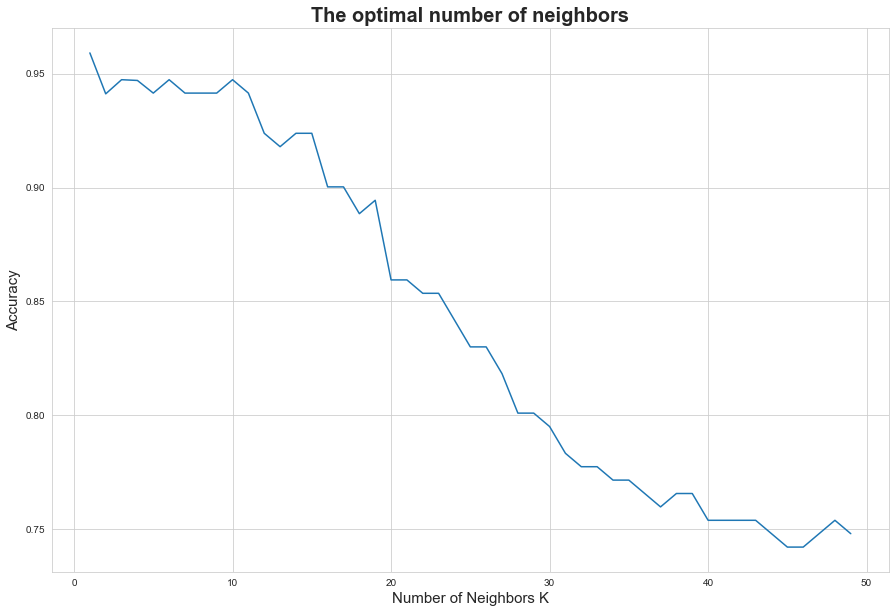

In [11]:
from sklearn.model_selection import cross_val_score
# creating list of K for KNN
k_list = list(range(1, 50, 1))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, cv_scores)
plt.show()